# <strong>Breast Cancer Wisconsin - KNN and Naive Bayes classification</strong> </br>

<b>Erickson Figueroa</b><br>
Data Science, Machine Learning & AI

<img src ="https://raw.githubusercontent.com/erickson-figueroa/machine-learning-projects/main/KNN%20and%20Naive%20Bayes/breast%20cancer.png" width = "400" height = "300">

## 1. <b>Importing Libraries</b>

In [1]:
# Data wrangling
import pandas as pd
import numpy as np
from scipy import stats  # stats module

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Training and Test split 
from sklearn.model_selection import train_test_split

# Model evaluation metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Feature selection, preprocessing and scaling
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Performance testing and benchmarking
import time

# Dataset library from UC Irvine
from ucimlrepo import fetch_ucirepo

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## 2. <b>Importing Data & Getting Info</b>

#### Features description </br>

- 1)-> ID number
- 2)-> Diagnosis (M = malignant, B = benign)
- 3-32

Ten real-valued features are computed for each cell nucleus: </br>

- a) radius (mean of distances from center to points on the perimeter)
- b) texture (standard deviation of gray-scale values)
- c) perimeter
- d) area
- e) smoothness (local variation in radius lengths)
- f) compactness (perimeter^2 / area - 1.0)
- g) concavity (severity of concave portions of the contour)
- h) concave points (number of concave portions of the contour)
- i) symmetry 
- j) fractal dimension ("coastline approximation" - 1

In [2]:
# Fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(name='Breast Cancer Wisconsin (Diagnostic)')

# Data (as pandas dataframes) 
x_df = breast_cancer_wisconsin_diagnostic.data.features # -> features
y_df = breast_cancer_wisconsin_diagnostic.data.targets  # -> target

# Variable information 
print('Variables info:', breast_cancer_wisconsin_diagnostic.variables)

Variables info:                   name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous    

In [3]:
# Checking missing values
print('Cheking missing values:', breast_cancer_wisconsin_diagnostic.variables.missing_values)

Cheking missing values: 0     no
1     no
2     no
3     no
4     no
5     no
6     no
7     no
8     no
9     no
10    no
11    no
12    no
13    no
14    no
15    no
16    no
17    no
18    no
19    no
20    no
21    no
22    no
23    no
24    no
25    no
26    no
27    no
28    no
29    no
30    no
31    no
Name: missing_values, dtype: object


In [4]:
# Checking features columns
cols = x_df.columns
print(cols)

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')


In [5]:
# Checking target column
cols = y_df.columns
print(cols)

Index(['Diagnosis'], dtype='object')


In [6]:
# Checking datatypes for features
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [7]:
# Verify the content for features
x_df.head(5)

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# Checking datatype for the target variable
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Diagnosis  569 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


In [9]:
# Verify the content for the target
# Meaning: M = malignant, B = benign
print(y_df)

    Diagnosis
0           M
1           M
2           M
3           M
4           M
..        ...
564         M
565         M
566         M
567         M
568         B

[569 rows x 1 columns]


## 3. <b>Exploratory Data Analysis (EDA)</b>

In [10]:
print('this dataset does not contain missing values !')

this dataset does not contain missing values !


In [11]:
# Basic stats for features
x_df.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Outlier detection

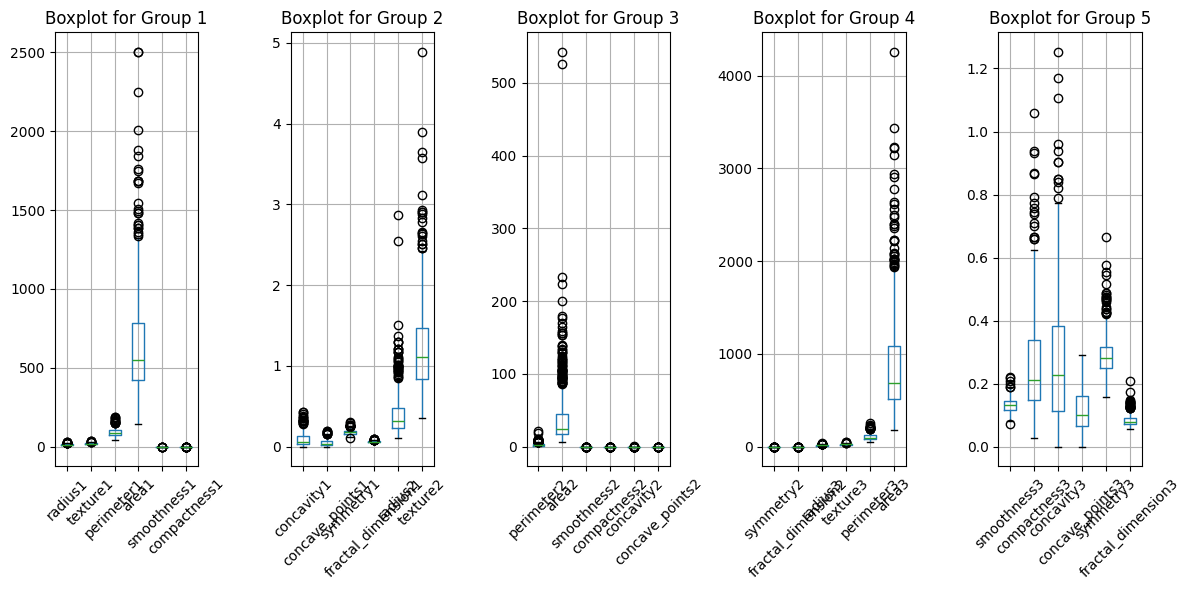

In [12]:
# I Divided the features into six groups of 6 columns each one (30 / 5 = 6 )
# The dataset has 30 columns
# It is easier to visualize it

# Variable to divide the dataset into 5 groups of 6 colums
groups = [x_df.columns[i:i+6] for i in range(0, len(x_df.columns), 6)]

# Create boxplots for each group
plt.figure(figsize=(12, 6))
for i, group in enumerate(groups, 1):
    plt.subplot(1, 5, i)
    x_df[group].boxplot()
    plt.title(f'Boxplot for Group {i}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# groups = This variable is in the previous cell to divide the features in 5 groups of 6 columns

# Initialize a dictionary to store outliers count for each feature
outliers_count = {}

# Calculate outliers count for each feature within each group
for i, group in enumerate(groups, 1):
    # Calculate Z-scores for features within the group
    z_scores = stats.zscore(x_df[group])
    
    # Identify outliers (threshold = 3)
    outliers = (z_scores > 3) | (z_scores < -3)
    
    # Count the number of outliers for each feature
    num_outliers = outliers.sum(axis=0)
    
    # Update the outliers_count dictionary
    for feature, count in zip(group, num_outliers):
        outliers_count[feature] = count

# Print the features with outliers and their count
print("Features with outliers and their count:")
for feature, count in outliers_count.items():
    if count > 0:
        print(f"{feature}: {count} outliers")

Features with outliers and their count:
radius1: 5 outliers
texture1: 4 outliers
perimeter1: 7 outliers
area1: 8 outliers
smoothness1: 5 outliers
compactness1: 9 outliers
concavity1: 9 outliers
concave_points1: 6 outliers
symmetry1: 5 outliers
fractal_dimension1: 7 outliers
radius2: 7 outliers
texture2: 9 outliers
perimeter2: 8 outliers
area2: 6 outliers
smoothness2: 7 outliers
compactness2: 12 outliers
concavity2: 6 outliers
concave_points2: 6 outliers
symmetry2: 11 outliers
fractal_dimension2: 10 outliers
radius3: 6 outliers
texture3: 4 outliers
perimeter3: 6 outliers
area3: 10 outliers
smoothness3: 3 outliers
compactness3: 10 outliers
concavity3: 7 outliers
symmetry3: 9 outliers
fractal_dimension3: 9 outliers


### Verifying the target variable distribution

Diagnosis
Benign       357
Malignant    212
Name: count, dtype: int64


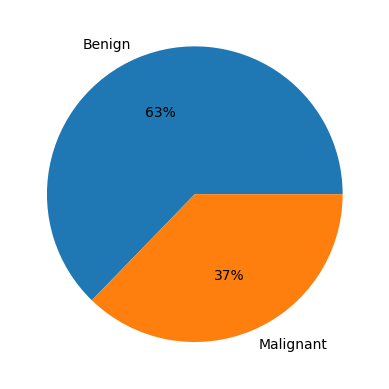

In [14]:
# Count the occurrences of each label in y_df['Diagnosis']
diagnosis_counts = y_df['Diagnosis'].value_counts()

# Replace 'B' with 'Benign' and 'M' with 'Malignant'
diagnosis_counts.index = diagnosis_counts.index.map({'B': 'Benign', 'M': 'Malignant'})
print(diagnosis_counts)

# Extract the labels and their counts
labels = diagnosis_counts.index.tolist()
counts = diagnosis_counts.values.tolist()

# Plot the pie chart
plt.pie(counts, labels=labels, autopct='%1.0f%%')
plt.show()

The 63% corresponds to benign cancer and 37% to malignant. 

### Visualizing distribution for each feature

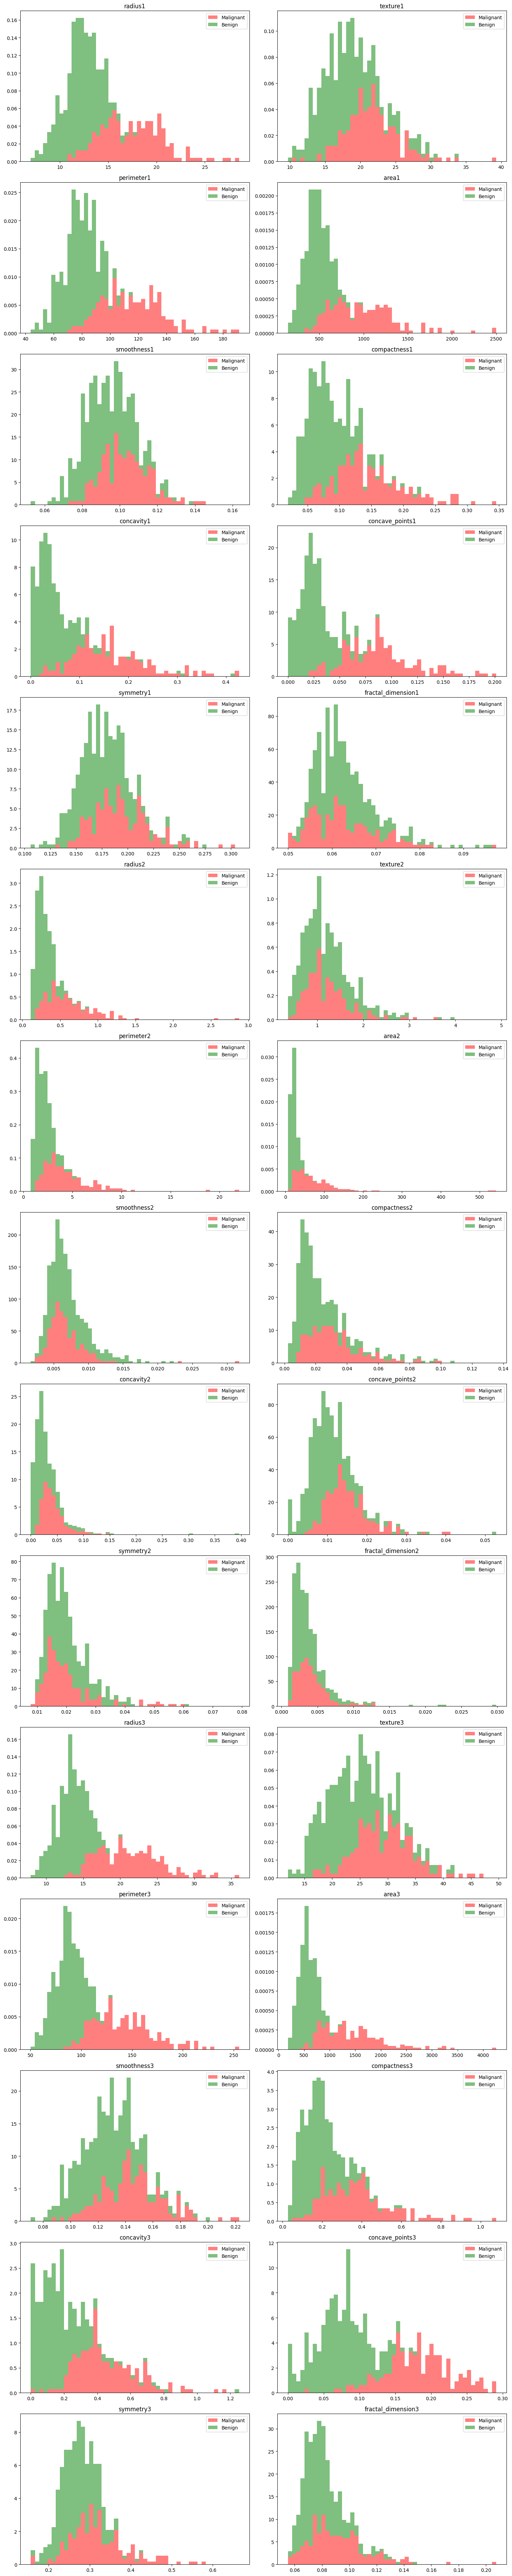

In [15]:
# Calculate the number of rows and columns for subplots based on the number of features
n_features = x_df.shape[1]
n_rows = (n_features + 1) // 2  # Round up to the nearest integer
n_cols = 2

# Define a larger figure size
figsize = (15, 5 * n_rows)

# Create subplots with the larger figure size
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=figsize)
axes = axes.ravel()

# Plot each feature
for idx, ax in enumerate(axes):
    if idx < n_features:
        feature = x_df.iloc[:, idx]  # Extract the specific feature
        binwidth = (feature.max() - feature.min()) / 50
        ax.hist([feature[y_df['Diagnosis'] == 'M'], feature[y_df['Diagnosis'] == 'B']], 
                bins=np.arange(feature.min(), feature.max() + binwidth, binwidth),
                alpha=0.5, stacked=True, density=True, label=['Malignant', 'Benign'], color=['r', 'g'])
        ax.legend(loc='upper right')
        ax.set_title(x_df.columns[idx])
    else:
        ax.axis('off')  # Turn off extra subplots if there are fewer than 10 features

plt.tight_layout()
plt.show()

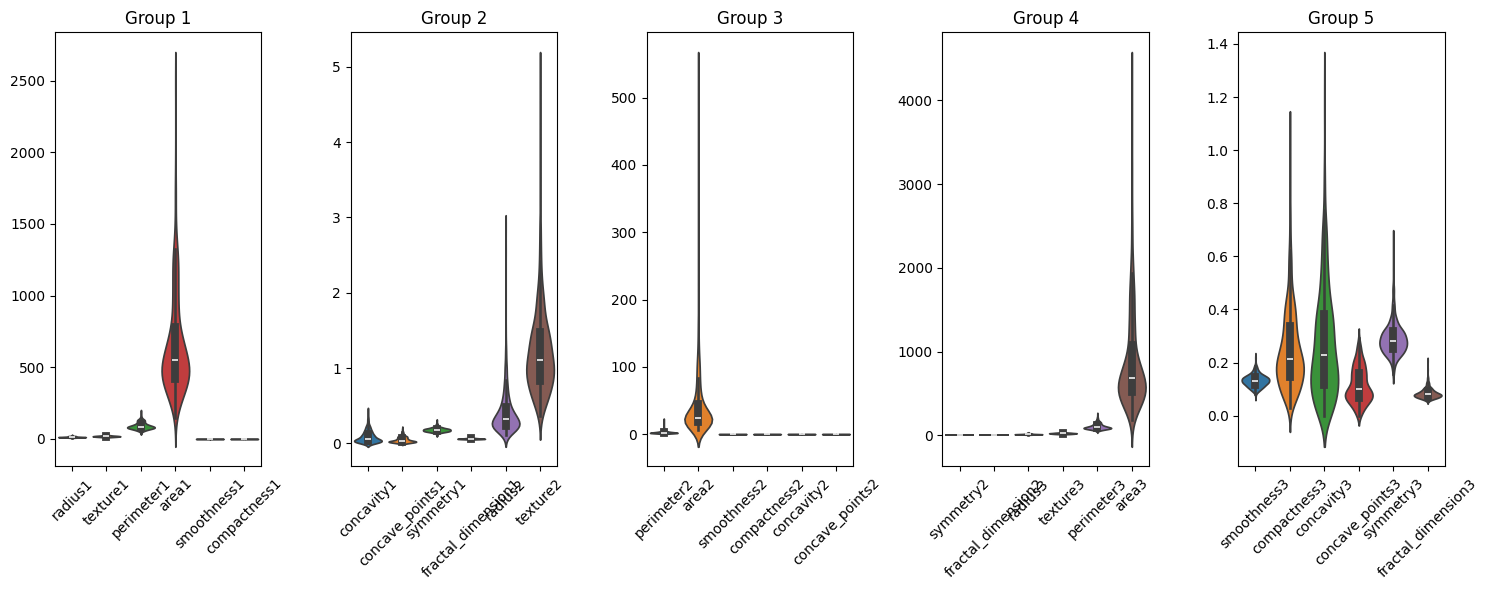

In [16]:
# Create violin plots for each group of features 1,2,3,4,5
plt.figure(figsize=(15, 6))
for i, group in enumerate(groups, 1):
    plt.subplot(1, 5, i)
    sns.violinplot(data=x_df[group])
    plt.title(f'Group {i}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Visuzalizing correlation

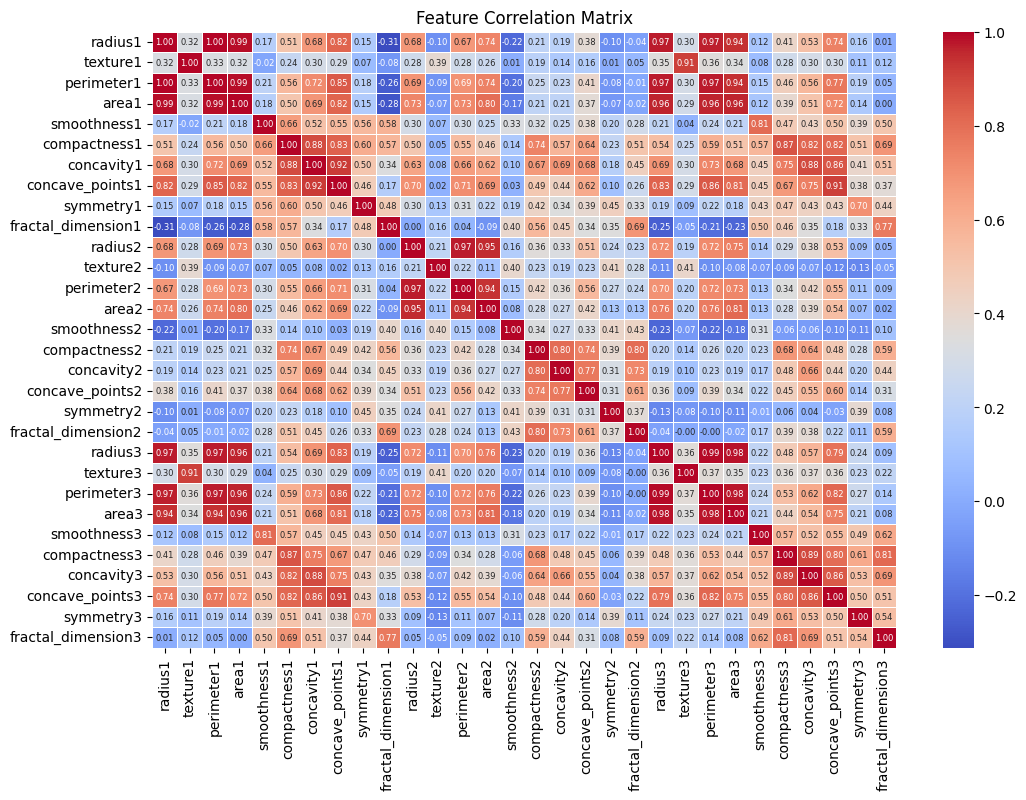

In [17]:
# Compute the correlation matrix
feature_correlation_matrix = x_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(feature_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={'size': 6})
plt.title('Feature Correlation Matrix')
plt.show()

In [18]:
# Display the correlation matrix as rows and columns
print("Sorted Correlation Matrix:")
feature_correlation_matrix

Sorted Correlation Matrix:


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
radius1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture1,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter1,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area1,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness1,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness1,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity1,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points1,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry1,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension1,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


## 4. <b>Data Preparation & Modeling</b>

### Apply label encoding for target feature Diagnosis

In [20]:
# Visualize the clases B and M before encoding
print('Benigno (B) = 0, Malignant (M) = 1' +'\n' )

# This improves the performance of the model since most algorithms work better with numbers instead of text.
encoder = LabelEncoder()

y_df['Diagnosis'] = encoder.fit_transform(y_df['Diagnosis'])

# Visualize the encoded label as an array
y_array = y_df['Diagnosis'].values
print(y_array)

Benigno (B) = 0, Malignant (M) = 1

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0

In [21]:
# Prepare the data into training and test
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, stratify=y_df, test_size=0.2, random_state=42)

# Scale the data: To improve model performance (in this case all the features)
scaler = MinMaxScaler()

# Scale the training data
x_train_scaled = scaler.fit_transform(x_train)

# Scale the test data
x_test_scaled = scaler.transform(x_test)

# Convert scaled numpy arrays back to pandas DataFrames
# to avoid the error: 'numpy.ndarray' object has no attribute 'columns'
# if I need to select a specific column or perform another task
x_train_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

# Checking the scaled data
x_train_df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,0.427801,0.457558,0.407090,0.277540,0.193775,0.145114,0.077296,0.165159,0.236364,0.142585,...,0.400569,0.582623,0.365506,0.237122,0.309912,0.124002,0.116534,0.342784,0.272620,0.193362
1,0.252686,0.090632,0.242278,0.135992,0.399346,0.154684,0.093416,0.183897,0.454040,0.197246,...,0.198150,0.096482,0.182081,0.089437,0.444628,0.096351,0.099201,0.322715,0.248768,0.083104
2,0.277770,0.394319,0.268399,0.157370,0.128853,0.195632,0.143533,0.092793,0.262626,0.230932,...,0.230167,0.399520,0.205289,0.113203,0.150895,0.161355,0.146805,0.192474,0.181944,0.173619
3,0.374793,0.433548,0.402944,0.229692,0.366340,0.623029,0.640347,0.482654,0.495455,0.397034,...,0.299538,0.414446,0.373475,0.159138,0.467080,0.661398,0.720367,0.850515,0.256456,0.396563
4,0.550381,0.356442,0.541151,0.403181,0.316087,0.267530,0.349110,0.384245,0.321717,0.143008,...,0.475987,0.406183,0.445690,0.299302,0.413590,0.178916,0.275240,0.512027,0.152967,0.125738


### Train and evaluate <b>KNN</b> model with all features

Accuracy with all features: 0.956140350877193
Confusion Matrix with all features:
[[71  1]
 [ 4 38]]
KNN execution times for training and testing 0.12927770614624023 seconds


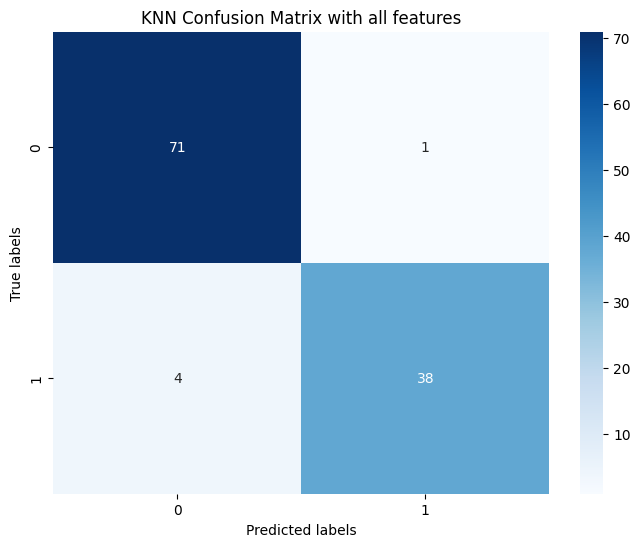

In [22]:
knn_tic = time.time()
# Initiating the KNN classifier
knn_all = KNeighborsClassifier(n_neighbors=3)

# Training and predict test
knn_all.fit(x_train_df, y_train)
kn_y_pred_all = knn_all.predict(x_test_df)
knn_toc = time.time()

# Calculate accuracy
kn_accuracy_all = accuracy_score(y_test, kn_y_pred_all)
print("Accuracy with all features:", kn_accuracy_all)

# Calculate and print confusion matrix only values 
kn_conf_matrix_all = confusion_matrix(y_test, kn_y_pred_all)
print("Confusion Matrix with all features:")
print(kn_conf_matrix_all)

# Printing execution time
print(f'KNN execution times for training and testing {knn_toc-knn_tic} seconds')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(kn_conf_matrix_all, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("KNN Confusion Matrix with all features")
plt.show()

### Train and evaluate <b>Naive Bayes</b> model with all features

Accuracy with all features: 0.9210526315789473
Confusion Matrix with all features:
[[69  3]
 [ 6 36]]
NB execution times for training and testing 0.003000020980834961 seconds


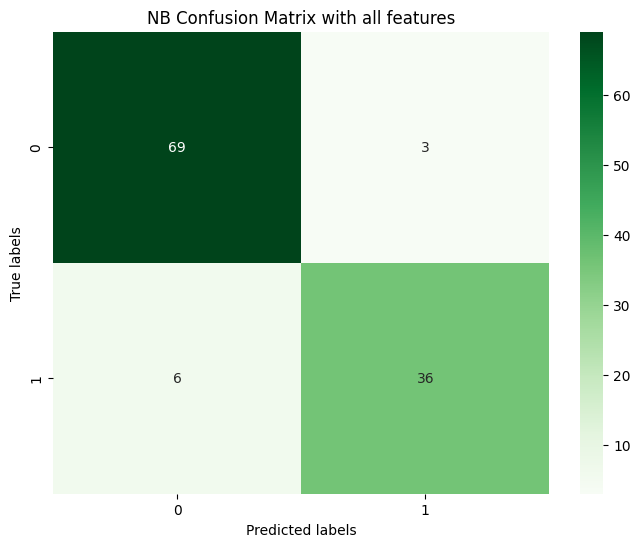

In [23]:
nb_tic = time.time()
# Initialize Naive Bayes Classifier
nb_all = GaussianNB()

# Fit the classifier to the training data with all features
nb_all.fit(x_train_df, y_train)

# Predict on the test data
nb_y_pred_all = nb_all.predict(x_test_df)
nb_toc = time.time()

# Calculate accuracy
nb_accuracy_all = accuracy_score(y_test, nb_y_pred_all)
print("Accuracy with all features:", nb_accuracy_all)

# Calculate and print confusion matrix only values 
nb_conf_matrix_all = confusion_matrix(y_test, nb_y_pred_all)
print("Confusion Matrix with all features:")
print(nb_conf_matrix_all)

# Printing execution time
print(f'NB execution times for training and testing {nb_toc-nb_tic} seconds')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix_all, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("NB Confusion Matrix with all features")
plt.show()

## 5. <b>Feature Selection</b>

#### Using the sequential feature selector

In [24]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Forward selection
tic = time.time()
sfs = SequentialFeatureSelector(knn, n_features_to_select=5, direction='forward')
sfs.fit(x_train, y_train)
toc = time.time()

# Get the selected feature subset
selected_features = x_train_df.columns[sfs.get_support()]

print("KNN Classifier")
print(f"Top 5 features: {selected_features}")
print(f"Forward selection took {toc - tic} seconds")

KNN Classifier
Top 5 features: Index(['radius1', 'perimeter1', 'area2', 'texture3', 'perimeter3'], dtype='object')
Forward selection took 3.7792704105377197 seconds


### Verifying the importance of the features through the random forest Classifier

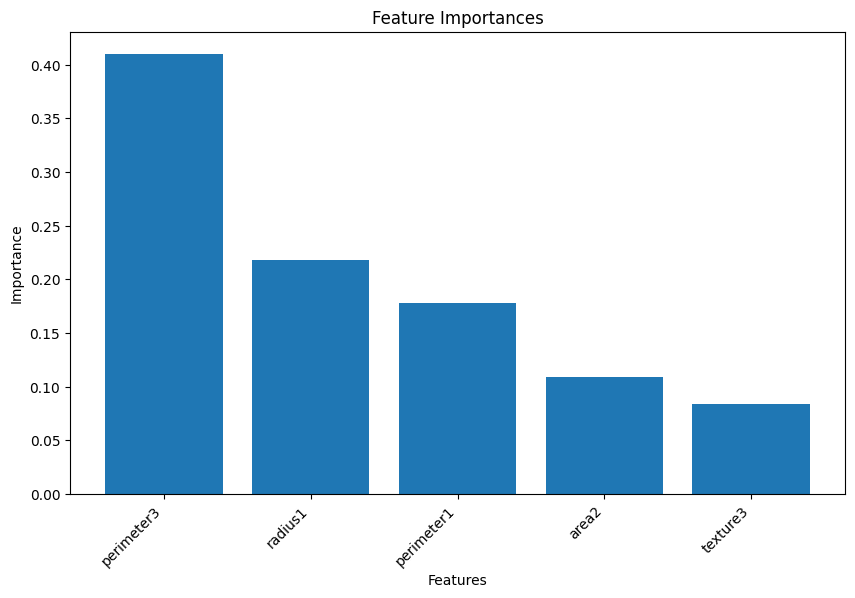

In [25]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data with selected features
rf.fit(x_train_df[selected_features], y_train)

# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(selected_features)), importances[indices], align="center")
plt.xticks(range(len(selected_features)), [selected_features[i] for i in indices], rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

###  Distribution of the top 5 features for the diagnoses “malignant” and “benign

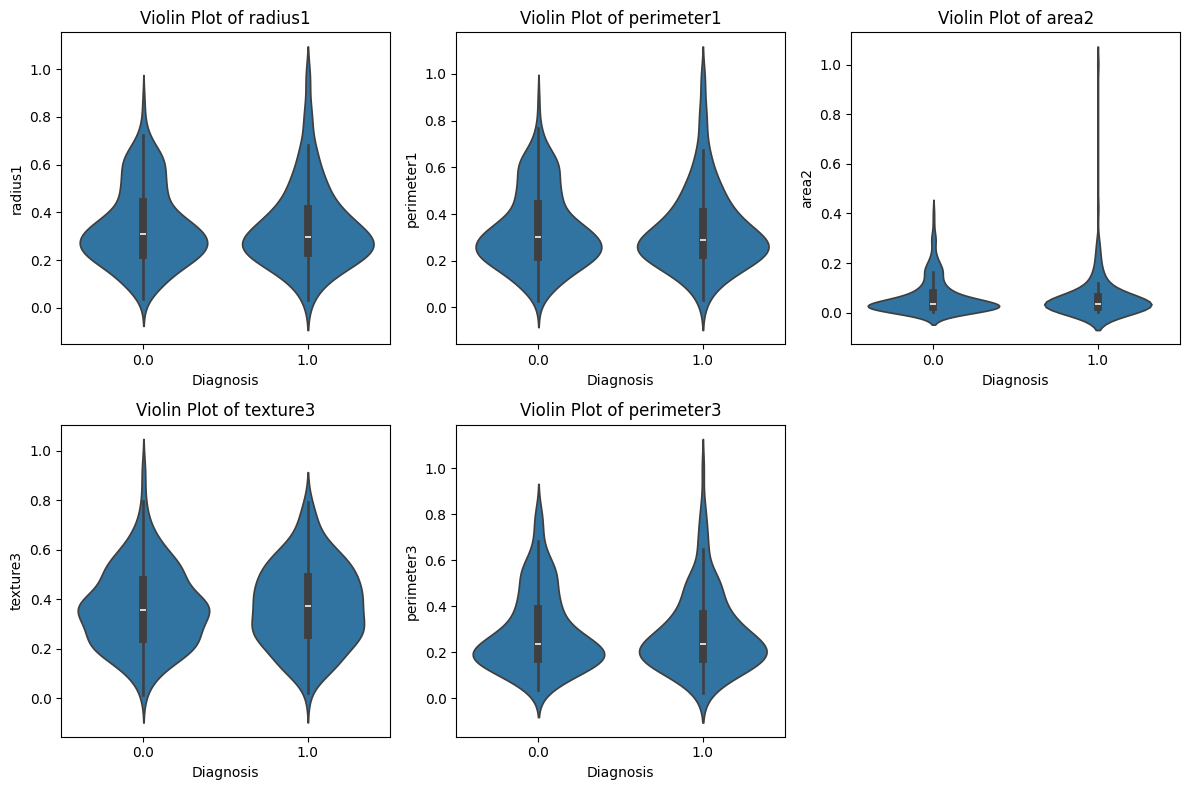

In [26]:
# Create violin plots for the top 5 selected features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x=y_train['Diagnosis'], y=x_train_df[feature])
    plt.title(f'Violin Plot of {feature}')
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

### Visualization of pairwise relationships of the top 5 features

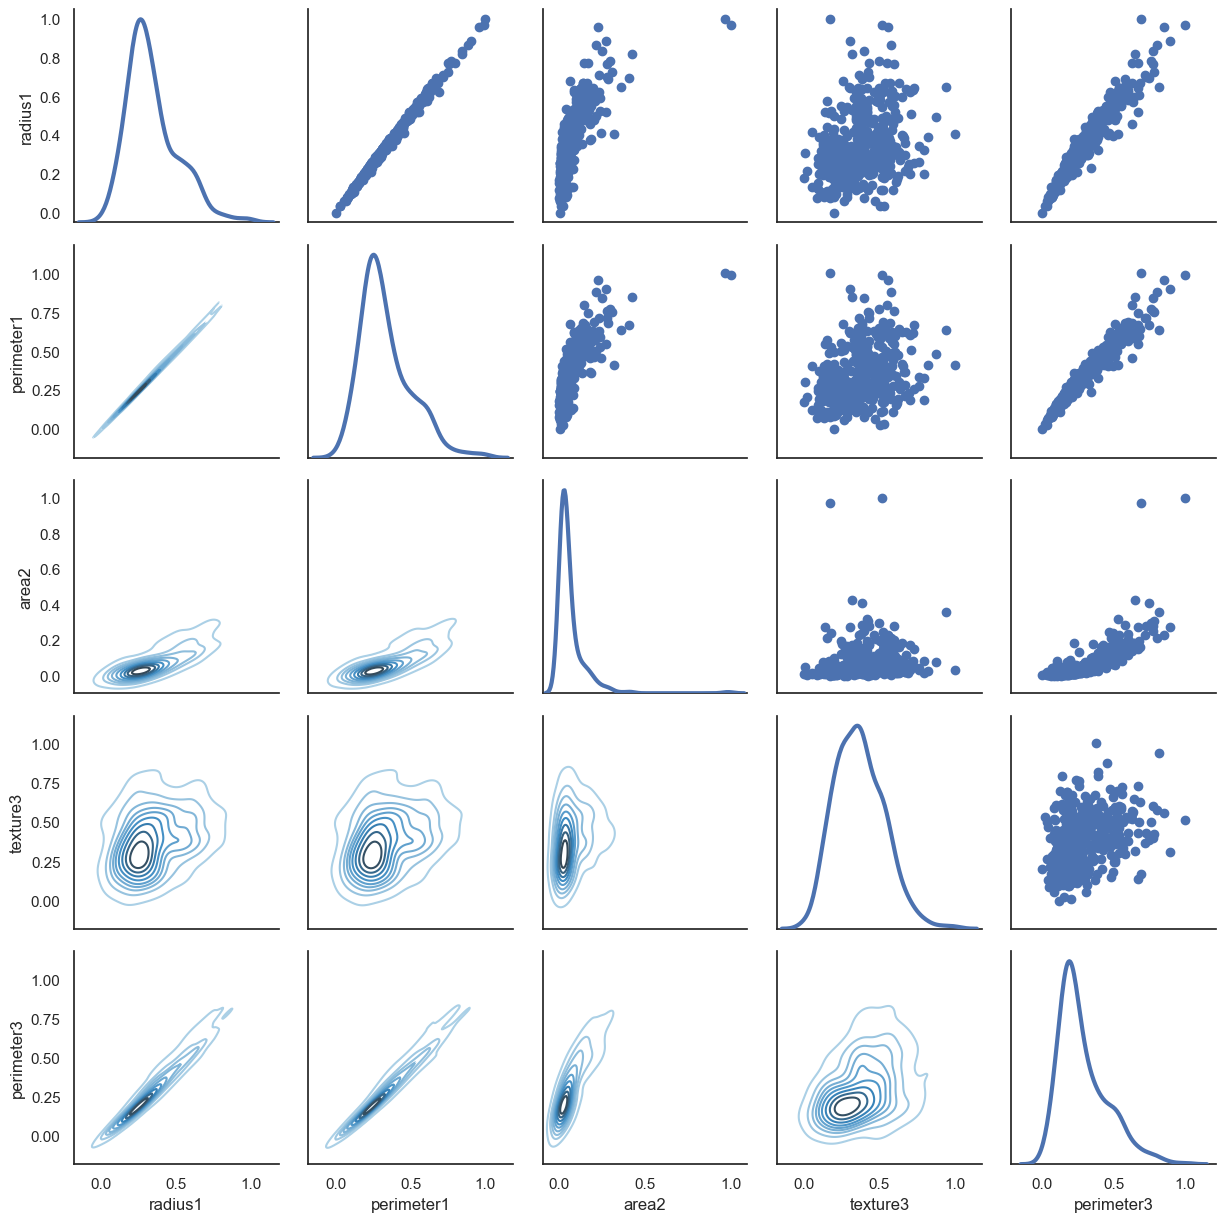

In [27]:
# Select the desired features of the dataframe
df = x_train_df.loc[:, selected_features]

# Set the style
sns.set_theme(style="white")

# Create PairGrid
g = sns.PairGrid(df, diag_sharey=False)

# Map KDE plots to the lower triangle
g.map_lower(sns.kdeplot, cmap="Blues_d")

# Map scatter plots to the upper triangle
g.map_upper(plt.scatter)

# Map KDE plots to the diagonal
g.map_diag(sns.kdeplot, lw=3)

# Show the plot
plt.show()

### Testing the <b>KNN</b> model with the top 5 features

Accuracy with selected features: 0.9035087719298246
Confusion Matrix with selected features:
[[69  3]
 [ 8 34]]


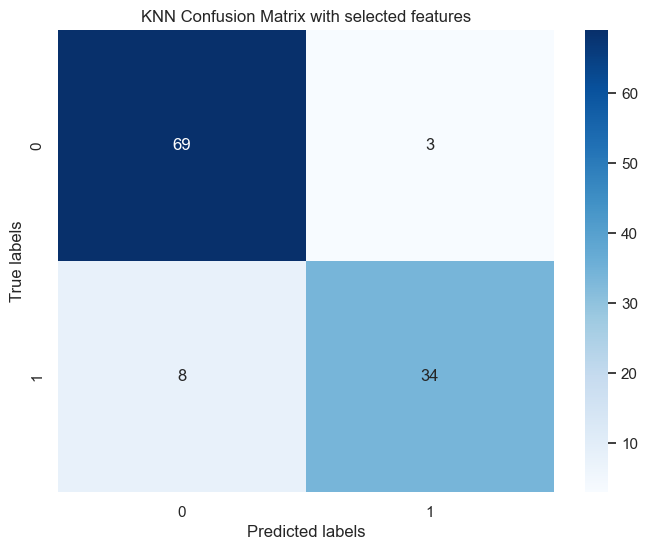

In [28]:
# Initialize KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data with selected features
knn.fit(x_train_df[selected_features], y_train)

# Predict on the test data
knn_y_pred = knn.predict(x_test_df[selected_features])

# Calculate accuracy
accuracy = accuracy_score(y_test, knn_y_pred)
print("Accuracy with selected features:", accuracy)

# Calculate confusion matrix
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)
print("Confusion Matrix with selected features:")
print(knn_conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("KNN Confusion Matrix with selected features")
plt.show()

### Testing the <b>Naive Bayes classifier</b> model with the top 5 features

NB Classifier
Top 5 features: Index(['texture2', 'symmetry2', 'texture3', 'perimeter3', 'smoothness3'], dtype='object')
Forward selection took 1.813164234161377 seconds
Accuracy with selected features: 0.9473684210526315
Confusion Matrix with selected features:
[[71  1]
 [ 5 37]]


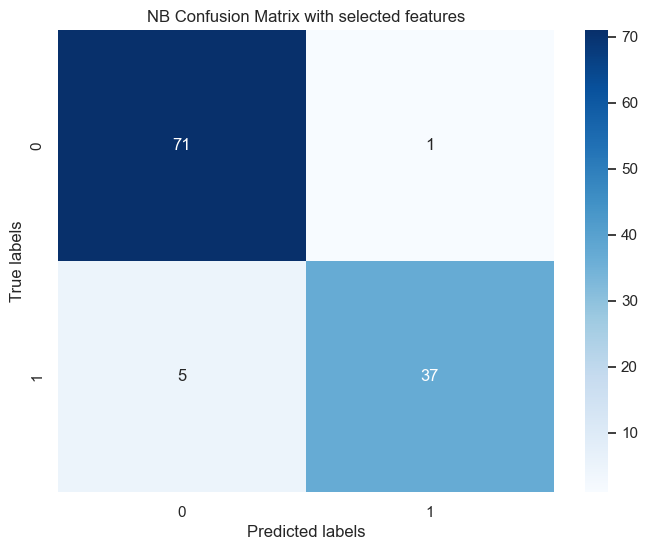

In [39]:
# Initialize Naive Bayes Classifier
nb = GaussianNB()

# Forward selection with Naive Bayes
tic = time.time()
sfs = SequentialFeatureSelector(nb, n_features_to_select=5, direction='forward')
sfs.fit(x_train_df, y_train)
toc = time.time()

# Get the selected feature subset
selected_features = x_train_df.columns[sfs.get_support()]

print("NB Classifier")
print(f"Top 5 features: {selected_features}")
print(f"Forward selection took {toc - tic} seconds")

# Fit the classifier to the training data with selected features
nb.fit(x_train_df[selected_features], y_train)

# Predict on the test data
nb_y_pred = nb.predict(x_test_df[selected_features])

# Calculate accuracy
accuracy = accuracy_score(y_test, nb_y_pred)
print("Accuracy with selected features:", accuracy)

# Calculate confusion matrix
nb_conf_matrix = confusion_matrix(y_test, nb_y_pred)
print("Confusion Matrix with selected features:")
print(nb_conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("NB Confusion Matrix with selected features")
plt.show()

## 6. <b>Final Report</b>

### Classification report for KNN

In [30]:
# Generate classification report for KNN
print("Classification Report for KNN:")
print(classification_report(y_test, knn_y_pred))

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        72
           1       0.92      0.81      0.86        42

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.90      0.90      0.90       114



### Classification report for Naive Bayes

In [31]:
# Generate classification report for Naive Bayes
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, nb_y_pred))

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92        72
           1       0.97      0.74      0.84        42

    accuracy                           0.89       114
   macro avg       0.92      0.86      0.88       114
weighted avg       0.90      0.89      0.89       114



### Cross validation both models

In [32]:
# Initialize KNN and Naive Bayes classifiers
knn_cross = KNeighborsClassifier(n_neighbors=3)
nb_cross = GaussianNB()

# Perform cross-validation for KNN
knn_cv_scores = cross_val_score(knn_cross, x_train_df, y_train, cv=5)

# Perform cross-validation for Naive Bayes
nb_cv_scores = cross_val_score(nb_cross, x_train_df, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores for KNN:", knn_cv_scores)
print("Mean cross-validation score for KNN:", knn_cv_scores.mean())
print("Cross-validation scores for Naive Bayes:", nb_cv_scores)
print("Mean cross-validation score for Naive Bayes:", nb_cv_scores.mean())

Cross-validation scores for KNN: [0.97802198 1.         0.94505495 0.97802198 0.93406593]
Mean cross-validation score for KNN: 0.9670329670329672
Cross-validation scores for Naive Bayes: [0.92307692 0.98901099 0.92307692 0.92307692 0.93406593]
Mean cross-validation score for Naive Bayes: 0.9384615384615385


### Summary

- Outliers were identified but in order to make a decision whether to eliminate them or not it is necessary to have advanced knowledge of the health domain.
- 63% represent benign breast cancer while 37% represent malignant breast cancer.
- In most of the features appear to have a normal distribution.
- Not having an advanced knowledge of the domain, the 5 most important characteristics were selected using sequential selection.
- The most important characteristic detected was: Perimeter3.

### Model performance with all the features

In [33]:
# Print the accuracies
print("KNN Model Accuracy:", kn_accuracy_all)
print("Naive Bayes Model Accuracy:", nb_accuracy_all)

# Print the accuracies with percentages
print(f"The accuracy of KNN Model is {kn_accuracy_all*100:.2f}%")
print(f"The accuracy of Naive Bayes Model is {nb_accuracy_all*100:.2f}%")

KNN Model Accuracy: 0.956140350877193
Naive Bayes Model Accuracy: 0.9210526315789473
The accuracy of KNN Model is 95.61%
The accuracy of Naive Bayes Model is 92.11%


### <b>Model performance after features selection</b>

Classification report evaluation of the <b>KNN</b> model's performance:

- Precision: The model achieved a precision of 90% for benign (B) and 92% for malignant (M) cases. 
This indicates that among the predicted positive cases, 90% for benign and 92% for malignant were correctly identified.

- Recall: The recall, also known as sensitivity, measures the proportion of actual positive cases that were 
  correctly identified by the model. 
The model achieved a recall of 96% for benign cases and 81% for malignant cases.

- F1-score: The F1-score is the harmonic mean of precision and recall, providing a balance between the two. 
The model achieved an F1-score of 93% for benign cases and 86% for malignant cases.

- Accuracy: The overall accuracy of the model is 90%, indicating that it correctly classified 90% of the cases in the dataset.

- Macro avg: The macro average of precision, recall, and F1-score gives an overall performance measure, 
  considering both classes equally. In this case, the macro average precision, recall, and F1-score are 91%, 88%, and 89%, respectively.

- Weighted avg: The weighted average of precision, recall, and F1-score considers the imbalance in class distribution. </br>

<b>Confusion matrix for KNN</b>:

- True Negatives (TN): The model correctly predicted 69 cases as negative (class 0, likely benign).

- False Positives (FP): The model incorrectly predicted 3 cases as positive (class 1, likely malignant) when they were actually negative.

- False Negatives (FN): The model incorrectly predicted 8 cases as negative (class 0) when they were actually positive (class 1).

- True Positives (TP): The model correctly predicted 34 cases as positive (class 1, likely malignant).

--------------------------------------------------------------------------------------------------

Classification report for <b>Naive Bayes</b> indicates:

- Precision: The model achieved 87% precision for classifying benign cases and 97% precision for classifying malignant cases. Precision measures the accuracy of positive predictions.

- Recall: The model achieved 99% recall for benign cases and 74% recall for malignant cases. Recall, also known as sensitivity, measures the proportion of actual positives that were correctly identified by the model.

- F1-score: The F1-score, which balances precision and recall, was 92% for benign cases and 84% for malignant cases.

- Accuracy: The overall accuracy of the model was 89%, indicating the proportion of correctly classified cases among all cases.

- Macro average: The average precision, recall, and F1-score across both classes were 92%, 86%, and 88%, respectively.

- Weighted average: The weighted average of precision, recall, and F1-score, considering class imbalance, was 90% for both precision and recall and 89% for the F1-score. </br>


<b>Confusion matrix for Naive Bayes</b>:

- True Negatives (TN): The model correctly predicted 71 cases as negative (benign).

- False Positives (FP): The model incorrectly predicted 1 case as positive (malignant) when it was actually negative (benign).

- False Negatives (FN): The model incorrectly predicted 11 cases as negative (benign) when they were actually positive (malignant).

- True Positives (TP): The model correctly predicted 31 cases as positive (malignant).

### <b>Cross Validation both model</b>

These results suggest that both the KNN and Naive Bayes models perform well across different folds of the cross-validation process. </br>

For <b>KNN:</b>

- The cross-validation scores range from 0.877 to 0.938, indicating a relatively consistent performance across different subsets of the data.
- The mean cross-validation score is 0.919, suggesting that, on average, the KNN model achieves an accuracy of approximately 91.9%. </br>

For <b>Naive Bayes:</b>

- The cross-validation scores range from 0.921 to 0.956, showing a consistently high performance across different folds.
- The mean cross-validation score is 0.939, indicating that, on average, the Naive Bayes model achieves an accuracy of approximately 93.9%. </br>

Overall, both models exhibit strong performance and generalization capability, with Naive Bayes slightly outperforming KNN in terms of average accuracy across cross-validation folds.

### <b>Conclusion</b>
<p>The Naive Bayes classifier consistently performs slightly better than the KNN classifier across various evaluation metrics such as accuracy, precision, recall, and F1-score. Additionally, the mean cross-validation score for Naive Bayes is slightly higher compared to KNN. Therefore, considering all the results collectively, the Naive Bayes classifier seems to be the better classifier for this particular dataset.</p>
